### Breast Cancer Wisconsin (Diagnostic)

#### Problem Description
#### This project aims to identify subgroups in a breast cancer dataset using unsupervised learning. By clustering patients based on tumor features, the analysis helps uncover hidden patterns, potentially distinguishing high-risk and low-risk groups. This can aid in diagnosis, treatment planning, and early detection of breast cancer.

#### The notebook uses unsupervised learning, specifically the K-Means clustering algorithm, to group patients into clusters. It applies Principal Component Analysis (PCA) for dimensionality reduction to visualize the data and the Elbow Method to determine the optimal number of clusters. The clustering performance is evaluated using the silhouette score.

#### Dataset used: The Breast Cancer Wisconsin (Diagnostic) Dataset
Dataset is from Kaggle - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Load the data 

In [12]:
data = pd.read_csv("data.csv")

In [14]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dataset Structure and Exploratory Data Analysis (EDA)
Dataset has 569 Instances and 32 features.

In [17]:
# Check for missing values
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
display(missing_values)


Missing values in each column:


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
# Drop irrelevant columns (e.g., 'id', 'Unnamed: 32', etc.)
data = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [29]:
# Summary statistics
print("\nSummary statistics:\n", data.describe())


Summary statistics:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

#### What Does this tell us 
These statistics help in understanding the data distribution, identifying outliers, and selecting important features for clustering.

Interpretation of Summary Statistics:

The dataset contains tumor characteristics with wide variations. For example, radius_mean ranges from 6.98 to 28.11, showing significant differences in tumor size.
Most tumors have a radius close to the mean value of 14.13. Some features, such as area_mean, have high variability, indicating a wide range of tumor sizes.
Maximum values for some features, such as area_worst (4254.00), are much higher than the 75th percentile, suggesting possible outliers.
Some features, like perimeter_mean, radius_mean, and area_mean, show similar patterns, meaning they might be correlated or redundant.


#### Check for missing values

In [32]:

print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


##### Visualize the distribution of the target variable (if available)

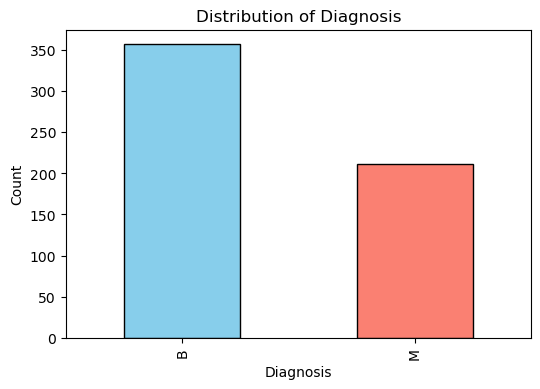

In [35]:
if 'diagnosis' in data.columns:
    plt.figure(figsize=(6, 4))
    data['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
    plt.title('Distribution of Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.show()
    
    # Encode the target variable for analysis if needed
    data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

#### What does the chart tell us - 
The bar chart shows the distribution of Benign (B) and Malignant (M) cases in the dataset. There are significantly more benign cases than malignant, meaning the dataset is imbalanced. This imbalance may affect model performance, requiring techniques like resampling to ensure fair predictions.

##### Visualize pairwise relationships

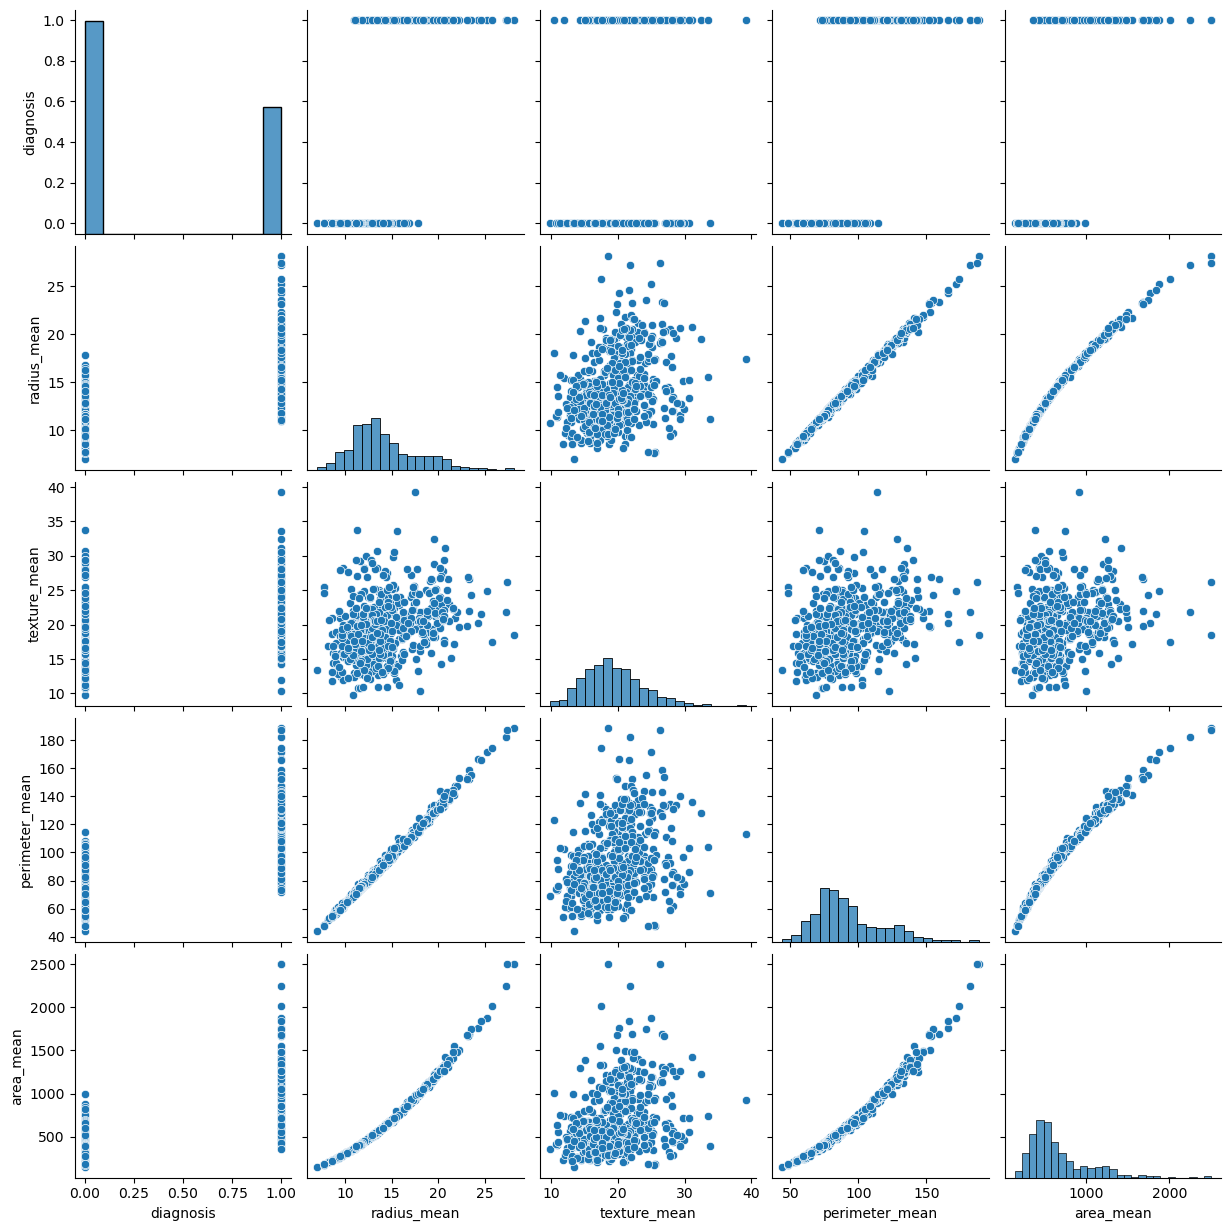

In [40]:
sns.pairplot(data.iloc[:, :5])  # Limit to the first 5 columns for simplicity
plt.show()


#### What does the pairplot tell us 

The pairplot helps us understand relationships between different numerical features in the dataset.
Some features, like radius_mean, perimeter_mean, and area_mean, show strong positive correlations, indicating redundancy.
The histograms along the diagonal reveal the distribution of each feature, highlighting skewness in certain variables.
Diagnosis is binary (0 or 1), and the distribution suggests some level of separation between the two classes.
This visualization provides insights into how features relate to one another and informs our clustering approach.


## Data Preprocessing
##### Separate features and scale them

In [44]:

features = data.drop(columns=['diagnosis'], errors='ignore')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



## Dimensionality Reduction (PCA)
##### Perform PCA to reduce dimensionality and visualize the data

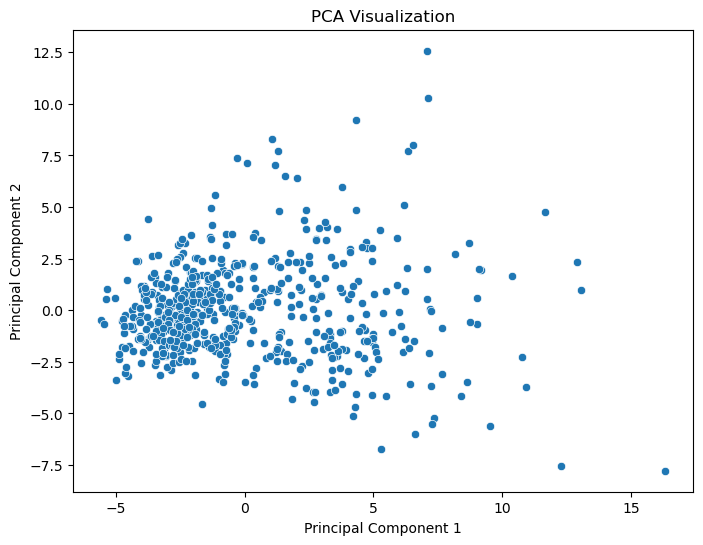

In [47]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#### Interpretation
The PCA plot helps in reducing the high-dimensional dataset into two principal components while retaining most of the variance.
The scatterplot shows how data points are distributed in this reduced space, revealing clusters or patterns.
If clear groupings are visible, it suggests underlying structures in the data, which are useful for clustering.
The spread of points along PC1 and PC2 suggests how well PCA captures variations among features.

In [71]:

## Clustering Analysis (K-Means)
##### Determine the optimal number of clusters using the Elbow Method

C:\Users\bniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\bniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\bniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\bniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

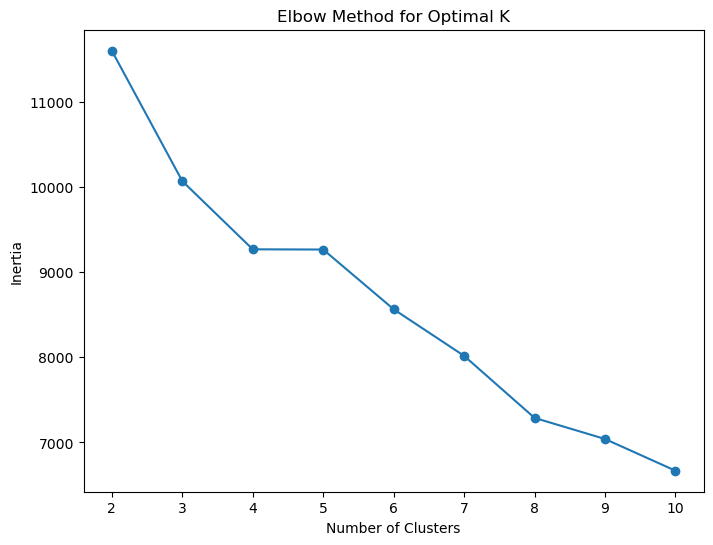

In [51]:

inertia = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

##### Select the optimal number of clusters (e.g., k=3 based on the Elbow Method)

#### What does the plot tell us 


The Elbow Method helps determine the optimal number of clusters by plotting inertia values for different K values.
As the number of clusters increases, the inertia decreases, meaning clusters become more compact.
The 'elbow point' is where the rate of inertia reduction slows down significantly, indicating the best choice for K.
In this case, the elbow appears around K=3, making it a good choice for clustering analysis.


In [54]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\bniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


##### Add cluster labels to the PCA dataframe

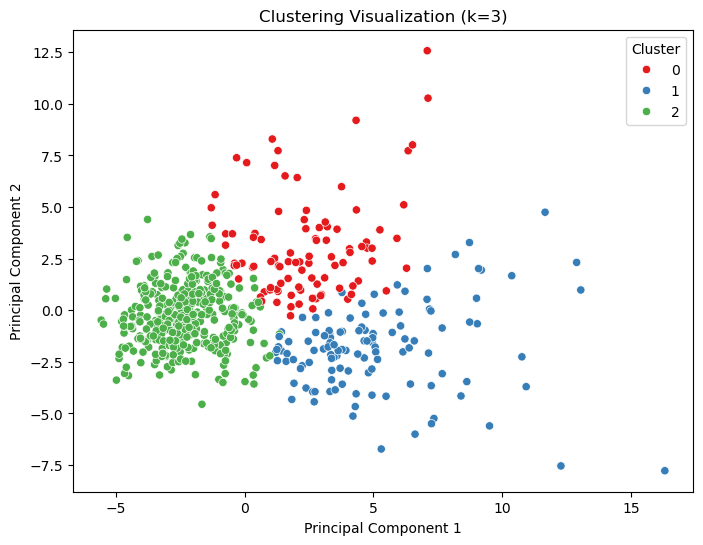

In [57]:
pca_df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title(f'Clustering Visualization (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### What does the scatterplot tell us 
The clustering visualization illustrates how the data points are grouped into three distinct clusters (red, blue, and green) in the reduced 2D space of principal components (PC1 and PC2). Each cluster represents a subgroup of data points that are similar to each other based on their features. This separation highlights the structure within the data and demonstrates how K-Means has grouped the points effectively. The clustering process leverages PCA, ensuring the data's variability is preserved while reducing dimensionality. The clear visual distinction between clusters indicates a well-defined grouping in this dataset.



## Step 6: Evaluate the Clustering
##### Compute the silhouette score to evaluate the clustering quality

In [61]:

silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Average Silhouette Score for k={optimal_k}: {silhouette_avg}")


Average Silhouette Score for k=3: 0.3151862330494096


#### What does this tell us
The silhouette score for k=3 clusters is 0.315, which indicates that the clusters are not very well-separated but still meaningful. Scores closer to 1 suggest well-defined and distinct clusters, while scores closer to 0 indicate overlapping clusters. This result implies that the clustering algorithm has identified patterns


## Discussion/Conclusion

This clustering analysis can help identify patterns in breast cancer data by grouping patients with similar tumor characteristics.
The PCA visualization shows how different features contribute to variations among patients, helping in data interpretation.
The clustering results can assist doctors in categorizing patients based on tumor similarities, which may improve diagnosis.
The Elbow Method and silhouette score indicate that k=3 provides moderate clustering, meaning there is some structure in the data.
Future improvements could include trying different clustering techniques or incorporating labeled data for supervised learning.
Overall, this analysis provides a foundation for further exploration into cancer classification and early detection techniques.